In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lib
import librosa.display as libdis
from IPython.display import Audio

In [4]:
Ravdess_DS='/content/drive/MyDrive/audio_speech_actors_01-24'
dataset = os.listdir(Ravdess_DS)




In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loc = []
emotions = []

# Modify the base directory path to your dataset
Ravdess_DS = '/content/drive/MyDrive/audio_speech_actors_01-24'

for item in dataset:
    try:
        actor_dir = os.path.join(Ravdess_DS, item)
        if os.path.isdir(actor_dir):
            actor_files = os.listdir(actor_dir)
            for file in actor_files:
                name = file.split('.')[0]
                parts = name.split('-')
                emotions.append(int(parts[2]))
                loc.append(os.path.join(actor_dir, file))
    except Exception as e:
        print(f"Error processing '{item}': {str(e)}")

# Create DataFrames
speech = pd.DataFrame({'Emotions': emotions})
location = pd.DataFrame({'Files': loc})
df = pd.concat([location, speech], axis=1)

df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

df.head()




Error processing 'Actor_21': list index out of range


Files Emotions
0  /content/drive/MyDrive/audio_speech_actors_01-...  neutral
1  /content/drive/MyDrive/audio_speech_actors_01-...  neutral
2  /content/drive/MyDrive/audio_speech_actors_01-...  neutral
3  /content/drive/MyDrive/audio_speech_actors_01-...  neutral
4  /content/drive/MyDrive/audio_speech_actors_01-...     calm

In [ ]:
df.Emotions.value_counts()


calm        176
happy       176
angry       176
sad         176
disgust     176
fear        176
surprise    176
neutral      88
Name: Emotions, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'neutral'),
  Text(1, 0, 'calm'),
  Text(2, 0, 'happy'),
  Text(3, 0, 'angry'),
  Text(4, 0, 'sad'),
  Text(5, 0, 'disgust'),
  Text(6, 0, 'fear'),
  Text(7, 0, 'surprise')])

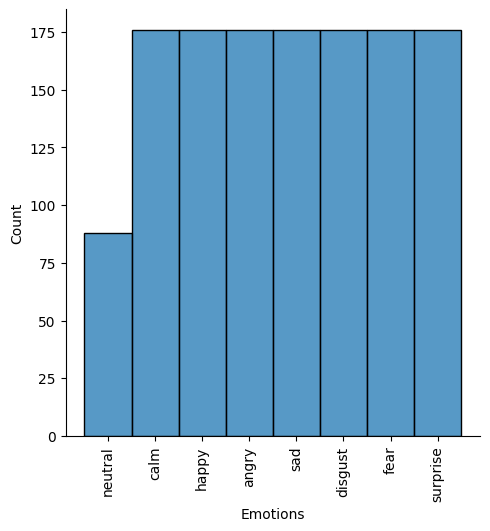

In [ ]:
sns.displot(df['Emotions'])
plt.xticks(rotation=90)


In [ ]:
def waveplot(data, sample_rate, emotion):
    plt.figure(figsize=(6,4))
    plt.title(emotion, size=8)
    libdis.waveshow(data, sr = sample_rate)
    plt.show()

def spectogram(data, sample_rate, emotion):
    x = lib.stft(data)
    xdecibels = lib.amplitude_to_db(abs(x))
    plt.figure(figsize=(6,4))
    plt.title(emotion, size=8)
    libdis.specshow(xdecibels, sr = sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()


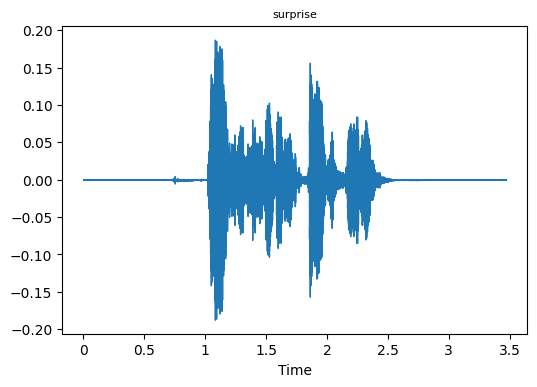

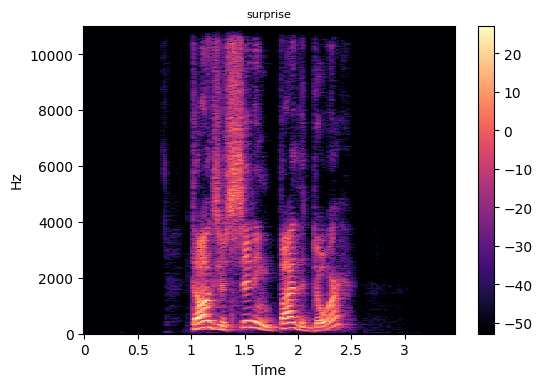

In [ ]:
emotion = 'surprise'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


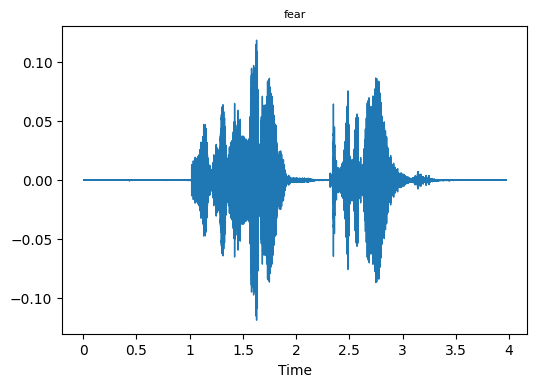

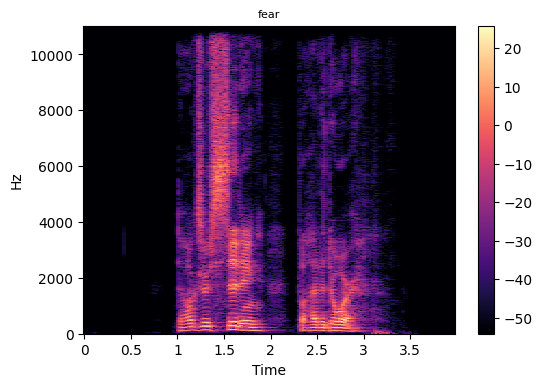

In [ ]:
emotion = 'fear'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


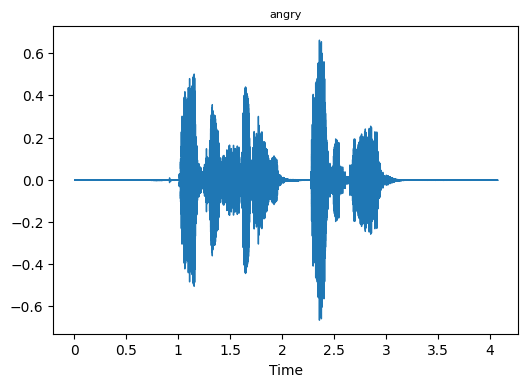

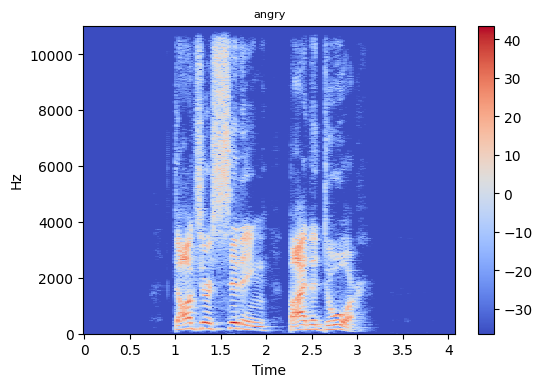

In [ ]:
emotion = 'angry'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


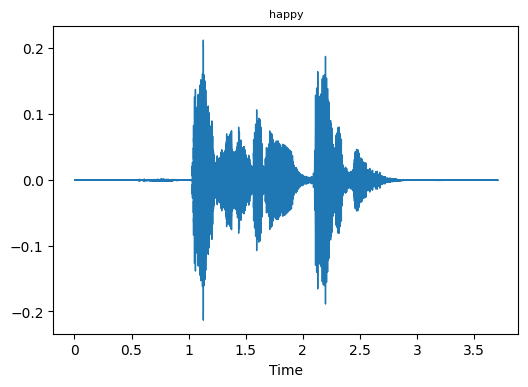

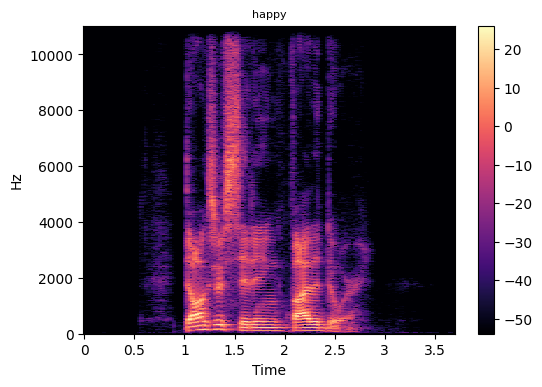

In [ ]:
emotion = 'happy'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


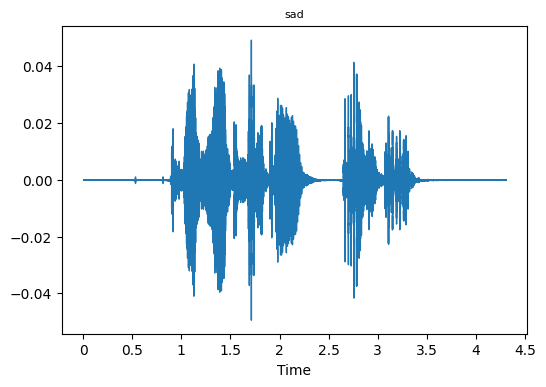

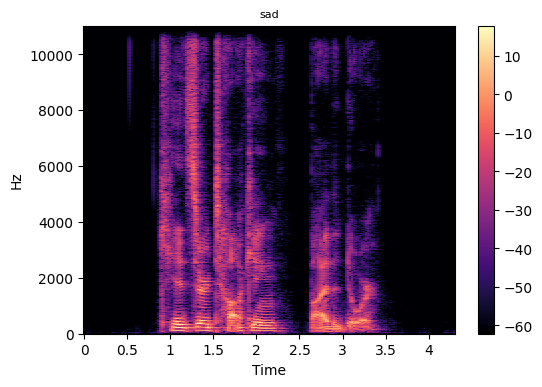

In [ ]:
emotion = 'sad'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


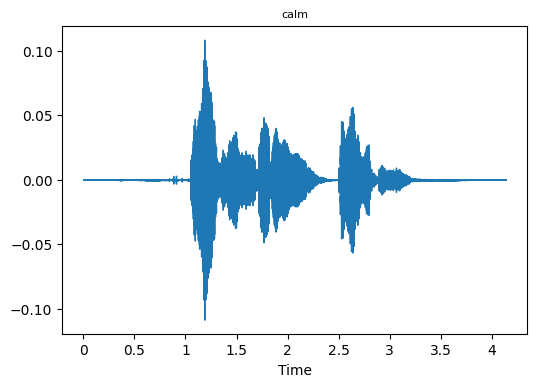

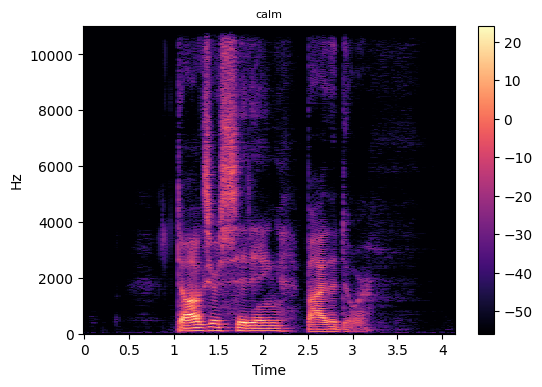

In [ ]:
emotion = 'calm'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


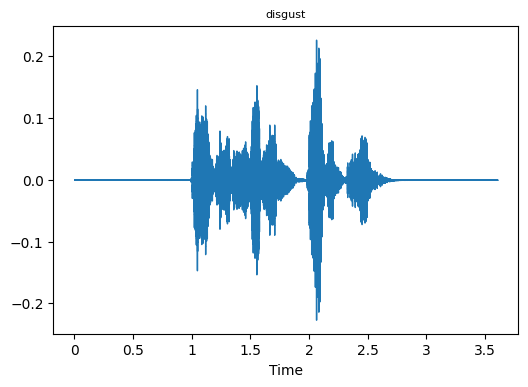

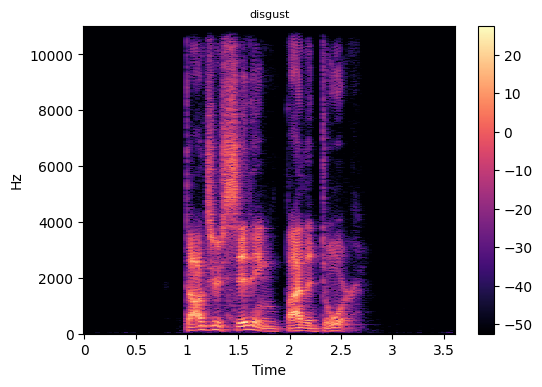

In [ ]:
emotion = 'disgust'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


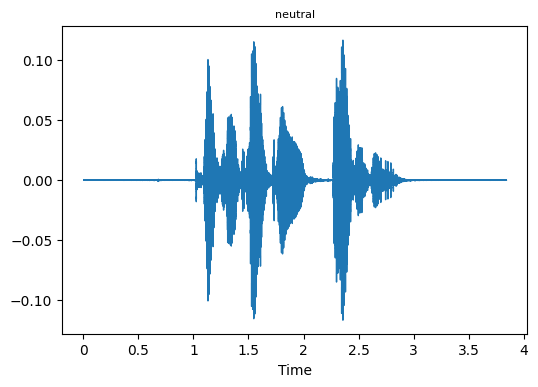

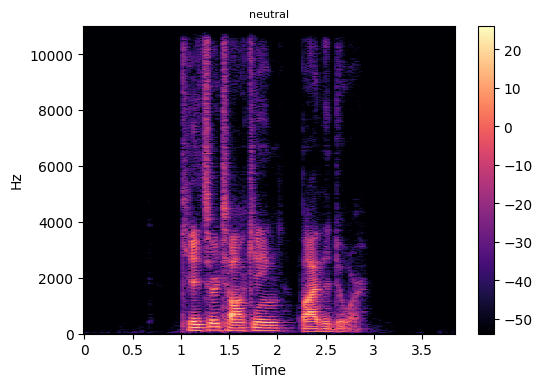

In [ ]:
emotion = 'neutral'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


In [ ]:
def mel_freq_caps_coeff(file):
    y, sampling_rate = lib.load(file, duration = 3, offset = 0.5)
    mfcc = np.mean(lib.feature.mfcc(y = y, sr = sampling_rate, n_mfcc = 40).T, axis=0)
    return mfcc


In [ ]:
X_mfcc = df['Files'].apply(lambda x: mel_freq_caps_coeff(x))
X_mfcc

0       [-552.3427, 83.21004, 3.8289814, 15.504502, 10...
1       [-573.8864, 83.03555, 4.4259663, 15.850526, 9....
2       [-578.08215, 83.40935, 3.895638, 15.704079, 13...
3       [-551.3756, 90.548294, 9.859568, 20.196661, 10...
4       [-527.10144, 90.665474, -2.1502876, 21.552725,...
                              ...                        
1315    [-632.3327, 66.466286, -0.38552165, 15.092796,...
1316    [-446.0513, 47.95513, -8.209037, 1.8928334, -9...
1317    [-434.45212, 53.705257, -3.967788, -7.021041, ...
1318    [-427.76328, 59.560143, -1.5502205, -0.3347520...
1319    [-520.9261, 49.6483, -6.148461, 8.639017, 0.09...
Name: Files, Length: 1320, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape


(1320, 40)

data preprocessing

In [ ]:
X = np.expand_dims(X, -1)
X.shape


(1320, 40, 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(df['Emotions'])
y


array([5, 5, 5, ..., 2, 2, 7])

lstm model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(8, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 69956 (273.27 KB)
Trainable params: 69956 (273.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X, y, validation_split=0.2, batch_size=10, epochs=100)


Epoch 1/100
106/106 [==============================] - 5s 28ms/step - loss: 2.0600 - accuracy: 0.1610 - val_loss: 2.0183 - val_accuracy: 0.2008
Epoch 2/100
106/106 [==============================] - 4s 34ms/step - loss: 1.9991 - accuracy: 0.2169 - val_loss: 1.9454 - val_accuracy: 0.2652
Epoch 3/100
106/106 [==============================] - 2s 22ms/step - loss: 1.9172 - accuracy: 0.2434 - val_loss: 1.9915 - val_accuracy: 0.1667
Epoch 4/100
106/106 [==============================] - 2s 22ms/step - loss: 1.8901 - accuracy: 0.2775 - val_loss: 1.8581 - val_accuracy: 0.2765
Epoch 5/100
106/106 [==============================] - 2s 22ms/step - loss: 1.8469 - accuracy: 0.2860 - val_loss: 1.8890 - val_accuracy: 0.2614
Epoch 6/100
106/106 [==============================] - 2s 21ms/step - loss: 1.8104 - accuracy: 0.3002 - val_loss: 1.8404 - val_accuracy: 0.2992
Epoch 7/100
106/106 [==============================] - 3s 30ms/step - loss: 1.8053 - accuracy: 0.2907 - val_loss: 1.8300 - val_accuracy:

In [ ]:
print(f"Test Accuracy: {max(history.history['val_accuracy']) * 100} %")


Test Accuracy: 37.12121248245239 %
